# malignant project

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

LOAD THE TWO PARTS OF DATASET

In [2]:
df=pd.read_csv("malignanttrain.csv")

In [3]:
df

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [4]:
testdf=pd.read_csv("malignanttest.csv")

In [5]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

we are havong multiple targets columns so summing the column values to set new target

# new target setting

In [6]:
sum_column = df["malignant"] + df["highly_malignant"] + df["rude"] + df["threat"] + df["abuse"] + df["loathe"] 
df["sum_malignant"]=sum_column

In [7]:
df

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  \
0               0                 0     0       0      0       0   
1               0                 0     0       0      0       0   
2               0                 0     0       0      0       0   
3               0                 0     0       0      0       0   
4               0                 0     0       0      0       0   
...           ...               ...   ...     ...    ...     ...   
159566          0                 0     0       0      0       0   
159567          0                 0     0       0      0       0   
159568          0                 0     0       0      0       0   
159569          0                 0     0       0      0       0   
159570          0                 0     0       0      0       0   

        sum_malignant  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
159566              0  
159567              0  
159568              0  
159569              0  
159570              0  

[159571 rows x 9 columns]

we are then considering our final target as sum_malignant

# df(traineddata)using for a model prediction,,&,testdf(testdata)using the model validation purpose

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
 8   sum_malignant     159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [9]:
df.head(15)

id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   

    malignant  highly_malignant  rude  threat  abuse  loathe  sum_malignant  
0           0                 0     0       0      0       0              0  
1           0                 0     0       0      0       0              0  
2           0                 0     0       0      0       0              0  
3           0                 0     0       0      0       0              0  
4           0                 0     0       0      0       0              0  
5           0                 0     0       0      0       0              0  
6           1                 1     1       0      1       0              4  
7           0                 0     0       0      0       0              0  
8           0                 0     0       0      0       0              0  
9           0                 0     0       0      0       0              0  
10          0                 0     0       0      0       0              0  
11          0                 0     0       0      0       0              0  
12          1                 0     0       0      0       0              1  
13          0                 0     0       0      0       0              0  
14          0                 0     0       0      0       0              0

In [10]:
df.tail(20)

id                                       comment_text  \
159551  ffbc2db4225258dd  While about half the references are from BYU-I...   
159552  ffbcd64a71775e04  Prague Spring \n\nI think that Prague Spring d...   
159553  ffbd331a3aa269b9  I see this as having been merged; undoing one ...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   
159555  ffc2f409658571f1  "\n\nHow come when you download that MP3 it's ...   
159556  ffc671f2acdd80e1  I'll be on IRC, too, if you have a more specif...   
159557  ffc7bbb177c3c966  It is my opinion that that happens to be off-t...   
159558  ffca1e81aefc48ac  Please stop removing content from Wikipedia; i...   
159559  ffca8d71d71a3fae  Image:Barack-obama-mother.jpg listed for delet...   
159560  ffcdcb71854f6d8a  "Editing of article without Consensus & Remova...   
159561  ffd2e85b07b3c7e4  "\nNo he did not, read it again (I would have ...   
159562  ffd72e9766c09c97  "\n Auto guides and the motoring press are not...   
159563  ffe029a7c79dc7fe  "\nplease identify what part of BLP applies be...   
159564  ffe897e7f7182c90  Catalan independentism is the social movement ...   
159565  ffe8b9316245be30  The numbers in parentheses are the additional ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  \
159551          0                 0     0       0      0       0   
159552          0                 0     0       0      0       0   
159553          0                 0     0       0      0       0   
159554          1                 0     1       0      1       0   
159555          0                 0     0       0      0       0   
159556          0                 0     0       0      0       0   
159557          0                 0     0       0      0       0   
159558          0                 0     0       0      0       0   
159559          0                 0     0       0      0       0   
159560          0                 0     0       0      0       0   
159561          0                 0     0       0      0       0   
159562          0                 0     0       0      0       0   
159563          0                 0     0       0      0       0   
159564          0                 0     0       0      0       0   
159565          0                 0     0       0      0       0   
159566          0                 0     0       0      0       0   
159567          0                 0     0       0      0       0   
159568          0                 0     0       0      0       0   
159569          0                 0     0       0      0       0   
159570          0                 0     0       0      0       0   

        sum_malignant  
159551              0  
159552              0  
159553              0  
159554              3  
159555              0  
159556              0  
159557              0  
159558              0  
159559              0  
159560              0  
159561              0  
159562              0  
159563              0  
159564              0  
159565              0  
159566              0  
159567              0  
159568              0  
159569              0  
159570              0

# CHECKING FOR NULL

In [11]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
sum_malignant       0
dtype: int64

<AxesSubplot:>

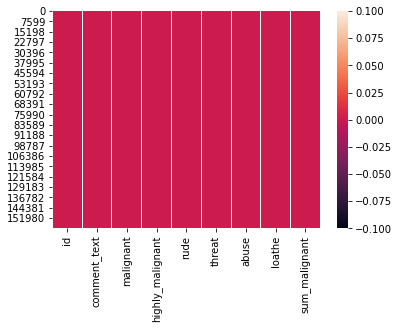

In [12]:
sn.heatmap(df.isnull())

null values are not there in data

In [13]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
sum_malignant        int64
dtype: object

# EDA

UNIVARIATE ANALYSIS

# TARGET:target column name is sum_malignant

In [14]:
df['sum_malignant']

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: sum_malignant, Length: 159571, dtype: int64

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: sum_malignant, dtype: int64


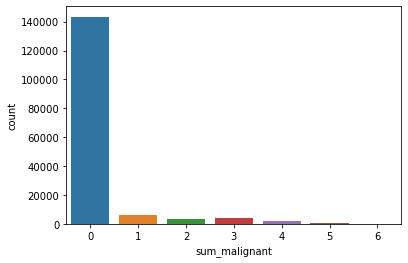

In [15]:
sn.countplot(df["sum_malignant"])
print(df["sum_malignant"].value_counts())

0  -  143346,
1   -   6360,
3   -   4209,
2    -  3480,
4    -  1760,
5     -  385,
6      -  31 THESE ARE THE DIFFERENT VALUES IN TARGET

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

0    144277
1     15294
Name: malignant, dtype: int64


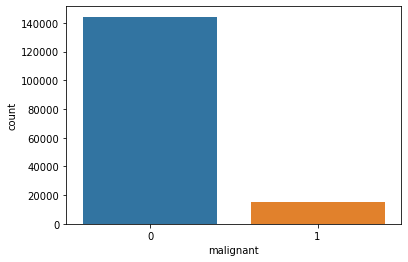

In [16]:
sn.countplot(df["malignant"])
print(df["malignant"].value_counts())

malignant COLUMN HAS TWO VARIABLES WITH COUNTS 0-144277 ,,1-15294

0    157976
1      1595
Name: highly_malignant, dtype: int64


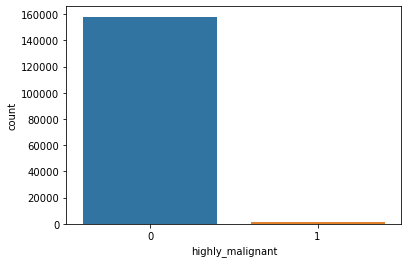

In [17]:
sn.countplot(df["highly_malignant"])
print(df["highly_malignant"].value_counts())

highly_malignant HAS 0- 157976,,,1-1595 COUNTS

0    151122
1      8449
Name: rude, dtype: int64


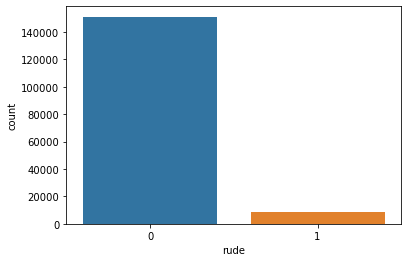

In [18]:
sn.countplot(df["rude"])
print(df["rude"].value_counts())

0    159093
1       478
Name: threat, dtype: int64


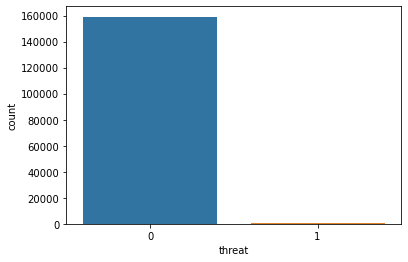

In [19]:
sn.countplot(df["threat"])
print(df["threat"].value_counts())

threat COLUMN HAS MOST 0 VALUE

0    151694
1      7877
Name: abuse, dtype: int64


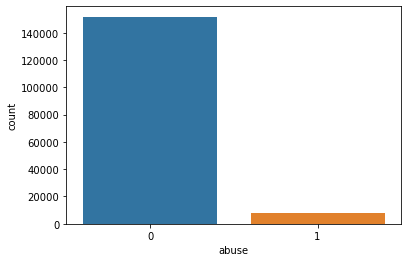

In [20]:
sn.countplot(df["abuse"])
print(df["abuse"].value_counts())

abuse COLUMN HAS 0 AND 1 VALUES AND ,,0 COUNTS ARE MOST

0    158166
1      1405
Name: loathe, dtype: int64


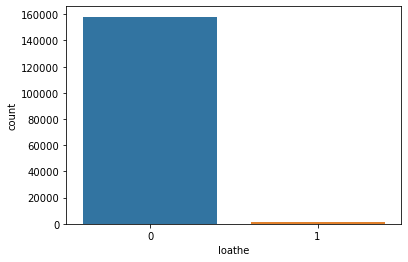

In [21]:
sn.countplot(df["loathe"])
print(df["loathe"].value_counts())

loath COLUMN IS A BIVARIATE COLUMN WITH 0 AND 1 VALUES

# BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'comparison of rude AND malignant'}, xlabel='malignant', ylabel='rude'>

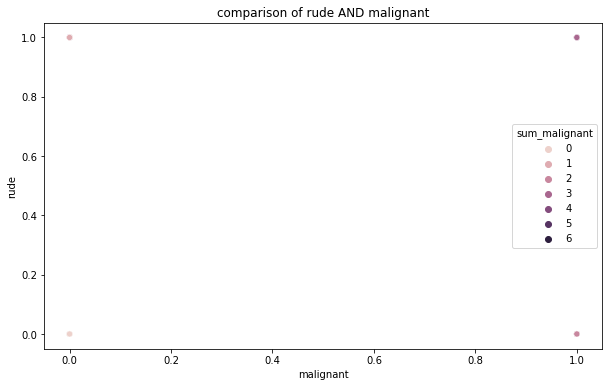

In [22]:
plt.figure(figsize=[10,6])
plt.title('comparison of rude AND malignant')
sn.scatterplot(df['malignant'],df['rude'],hue=df['sum_malignant'])

MULTIVARIATE ANALYSIS

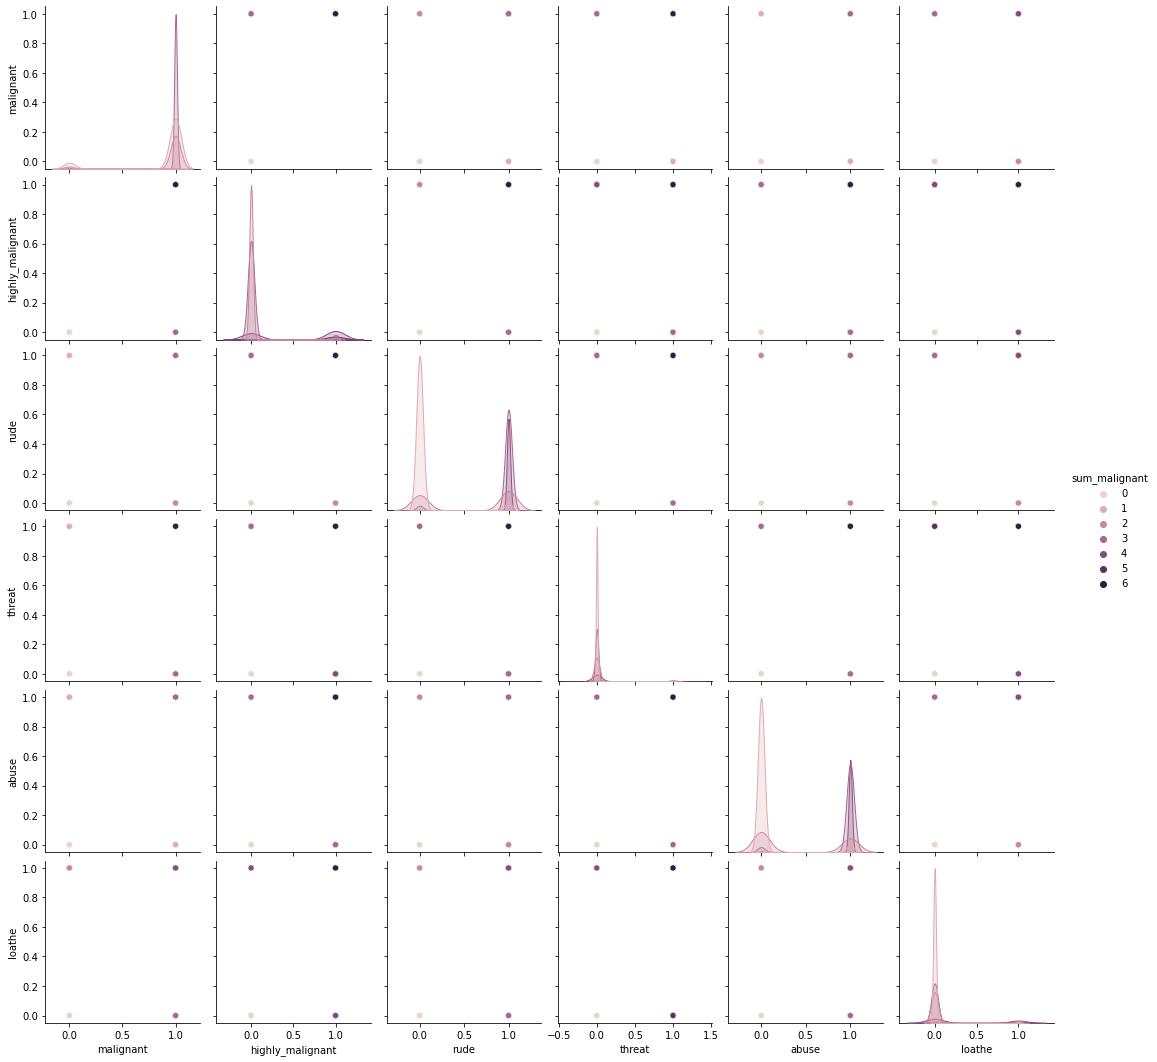

In [23]:
sn.pairplot(df,hue="sum_malignant")

# ENCODING

here we want to Changee object type datas

In [24]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
sum_malignant        int64
dtype: object

In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [26]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df.dtypes

id                  float64
comment_text        float64
malignant             int64
highly_malignant      int64
rude                  int64
threat                int64
abuse                 int64
loathe                int64
sum_malignant         int64
dtype: object

now all the object columns are converted to float dtypess

In [28]:
df

id  comment_text  malignant  highly_malignant  rude  threat  \
0            0.0       72698.0          0                 0     0       0   
1            1.0       68359.0          0                 0     0       0   
2            2.0       79594.0          0                 0     0       0   
3            4.0       35519.0          0                 0     0       0   
4            5.0      146426.0          0                 0     0       0   
...          ...           ...        ...               ...   ...     ...   
159566  159505.0       44289.0          0                 0     0       0   
159567  159510.0      145720.0          0                 0     0       0   
159568  159524.0      122203.0          0                 0     0       0   
159569  159535.0       60037.0          0                 0     0       0   
159570  159541.0       31106.0          0                 0     0       0   

        abuse  loathe  sum_malignant  
0           0       0              0  
1           0       0              0  
2           0       0              0  
3           0       0              0  
4           0       0              0  
...       ...     ...            ...  
159566      0       0              0  
159567      0       0              0  
159568      0       0              0  
159569      0       0              0  
159570      0       0              0  

[159571 rows x 9 columns]

# CORRELATION AND HEATMAP

In [29]:
cor=df.corr()

In [30]:
cor

id  comment_text  malignant  highly_malignant  \
id                1.000000      0.002812  -0.003263         -0.001403   
comment_text      0.002812      1.000000   0.132016          0.057627   
malignant        -0.003263      0.132016   1.000000          0.308619   
highly_malignant -0.001403      0.057627   0.308619          1.000000   
rude             -0.002188      0.104020   0.676515          0.403014   
threat           -0.001165      0.026093   0.157058          0.123601   
abuse            -0.002086      0.111724   0.647518          0.375807   
loathe           -0.000844      0.046234   0.266009          0.201600   
sum_malignant    -0.002919      0.130751   0.869050          0.517967   

                      rude    threat     abuse    loathe  sum_malignant  
id               -0.002188 -0.001165 -0.002086 -0.000844      -0.002919  
comment_text      0.104020  0.026093  0.111724  0.046234       0.130751  
malignant         0.676515  0.157058  0.647518  0.266009       0.869050  
highly_malignant  0.403014  0.123601  0.375807  0.201600       0.517967  
rude              1.000000  0.141179  0.741272  0.286867       0.879731  
threat            0.141179  1.000000  0.150022  0.115128       0.251314  
abuse             0.741272  0.150022  1.000000  0.337736       0.869177  
loathe            0.286867  0.115128  0.337736  1.000000       0.448341  
sum_malignant     0.879731  0.251314  0.869177  0.448341       1.000000

# HEAT MAP

<AxesSubplot:>

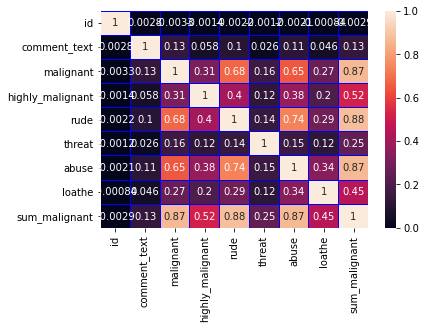

In [31]:
sn.heatmap(cor,annot=True,linewidth=0.1,linecolor='b')

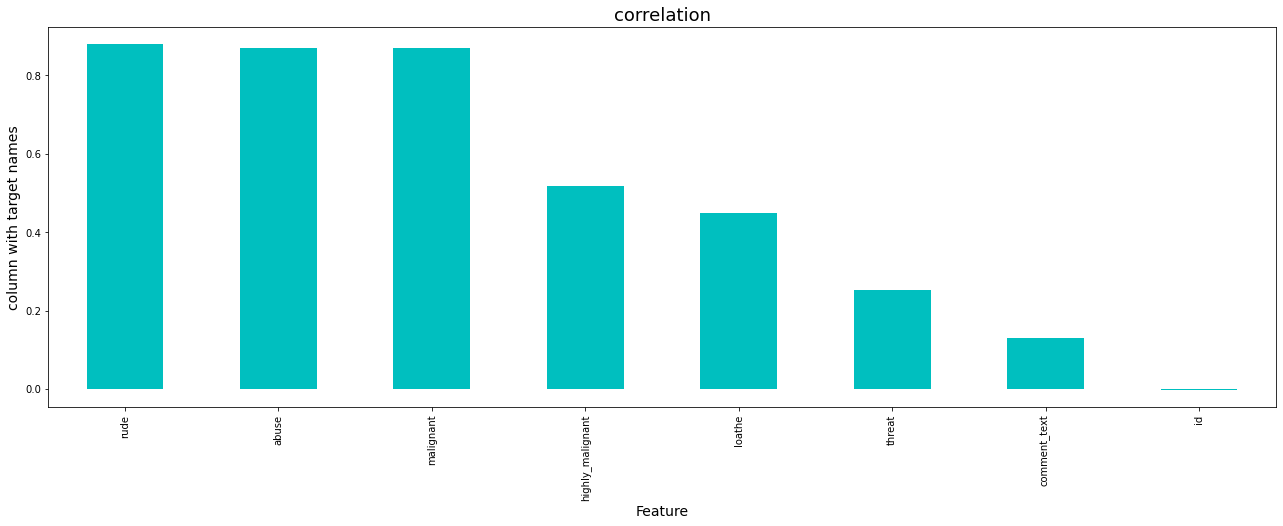

In [32]:
plt.figure(figsize=(22,7))
cor['sum_malignant'].sort_values(ascending=False).drop(['sum_malignant']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

this plot shows the dependency of each columns to target

here id has very less dependency so we can drop that column

In [33]:
df.drop(['id'],axis=1,inplace=True)

In [34]:
df.drop(['malignant'],axis=1,inplace=True)

In [35]:
df.drop(['highly_malignant'],axis=1,inplace=True)

In [36]:
df.drop(['rude'],axis=1,inplace=True)

In [37]:
df.drop(['threat'],axis=1,inplace=True)

In [38]:
df.drop(['abuse'],axis=1,inplace=True)

In [39]:
df.drop(['loathe'],axis=1,inplace=True)

In [40]:
df

comment_text  sum_malignant
0            72698.0              0
1            68359.0              0
2            79594.0              0
3            35519.0              0
4           146426.0              0
...              ...            ...
159566       44289.0              0
159567      145720.0              0
159568      122203.0              0
159569       60037.0              0
159570       31106.0              0

[159571 rows x 2 columns]

# Outlier and skewness treating

In [41]:
sn.boxplot(df['comment_text'])

<AxesSubplot:xlabel='comment_text'>

there is no chances of much outliers because bivariate data presence in all calumns exept comment_text

In [42]:
df.skew()

comment_text     1.282301e-19
sum_malignant    3.809303e+00
dtype: float64

The acceptable range of skewness is(-.5 to .5) so here want to remove it

SKEWNESS IS CLEARLEY VISIBLE IN PLOTS

# SPLITTING X AND Y AND APPLYING POWER TRANSFORMER TO AVOID SKEWNESS¶


In [43]:
x=df.drop("sum_malignant",axis=1)
y=df["sum_malignant"]

In [44]:
x

comment_text
0            72698.0
1            68359.0
2            79594.0
3            35519.0
4           146426.0
...              ...
159566       44289.0
159567      145720.0
159568      122203.0
159569       60037.0
159570       31106.0

[159571 rows x 1 columns]

In [45]:
y

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: sum_malignant, Length: 159571, dtype: int64

In [46]:
x.shape

(159571, 1)

In [47]:
y.shape

(159571,)

In [48]:
from sklearn.preprocessing import PowerTransformer

In [49]:
pt=PowerTransformer(method="yeo-johnson")

In [50]:
X_power=pt.fit_transform(x)

In [51]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [52]:
df1.skew()

comment_text   -0.291555
dtype: float64

it is not working so we going to apply sqrt

In [53]:
from scipy import sqrt

In [54]:
df.skew()

comment_text     1.282301e-19
sum_malignant    3.809303e+00
dtype: float64

both power transform and square root doesnt removed skewness,,so continueing 

# SAMPLING TARGET

HERE PREFERING SMOTE OR OVERSAMPLING

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm=SMOTE()

In [58]:
x1,y1=sm.fit_resample(x,y)

In [59]:
y1

0          0
1          0
2          0
3          0
4          0
          ..
1003417    6
1003418    6
1003419    6
1003420    6
1003421    6
Name: sum_malignant, Length: 1003422, dtype: int64

In [60]:
y1.value_counts()

0    143346
1    143346
2    143346
3    143346
4    143346
5    143346
6    143346
Name: sum_malignant, dtype: int64

ALL ARE IN AN ECCEPTABLE RANGE

# SCALING FEATURES

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
x1=sc.fit_transform(x1)

In [64]:
x1

array([[-0.57346681],
       [-0.67375697],
       [-0.41407502],
       ...,
       [ 1.1805716 ],
       [-0.44870934],
       [-0.31836969]])

# APPLYING DIFFERENT CLASSIFICATION ALGORITHMS

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [67]:
x_train.shape

(111699, 1)

In [68]:
x_test.shape

(47872, 1)

In [69]:
y_train.shape

(111699,)

In [70]:
y_test.shape

(47872,)

# DECISION TREE CLASSSIFIER

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc=DecisionTreeClassifier()

In [73]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
dtc.score(x_train,y_train)

1.0

In [75]:
preddtc=dtc.predict(x_test)

In [76]:
print(preddtc)

[3 0 0 ... 0 0 1]


# ACCURACY SCORE,CONFUSION MATRIX,CLASSIFICATION REPORT

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
accdtc=classification_report(y_test,preddtc)

In [79]:
print(accdtc)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     43031
           1       0.09      0.09      0.09      1876
           2       0.08      0.08      0.08      1050
           3       0.14      0.14      0.14      1285
           4       0.13      0.14      0.13       514
           5       0.04      0.04      0.04       109
           6       0.00      0.00      0.00         7

    accuracy                           0.84     47872
   macro avg       0.20      0.20      0.20     47872
weighted avg       0.84      0.84      0.84     47872



In [80]:
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[39721  1479   756   751   274    47     3]
 [ 1450   169   102   105    39    10     1]
 [  709   103    84   108    40     5     1]
 [  780   101    97   179   107    19     2]
 [  242    42    30   109    70    18     3]
 [   57     7     7    19    15     4     0]
 [    5     1     0     1     0     0     0]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     43031
           1       0.09      0.09      0.09      1876
           2       0.08      0.08      0.08      1050
           3       0.14      0.14      0.14      1285
           4       0.13      0.14      0.13       514
           5       0.04      0.04      0.04       109
           6       0.00      0.00      0.00         7

    accuracy                           0.84     47872
   macro avg       0.20      0.20      0.20     47872
weighted avg       0.84      0.84      0.84     47872



# K-NEAREST NEIGHBOR

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
predknn=knn.predict(x_test)

In [84]:
print(predknn)

[3 0 0 ... 0 0 0]


# accuracy score ,confusion matrix,classification report

In [85]:
accknn=classification_report(y_test,predknn)

In [86]:
print(accknn)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     43031
           1       0.19      0.03      0.05      1876
           2       0.17      0.02      0.04      1050
           3       0.33      0.10      0.16      1285
           4       0.32      0.09      0.14       514
           5       0.14      0.01      0.02       109
           6       0.00      0.00      0.00         7

    accuracy                           0.90     47872
   macro avg       0.29      0.18      0.19     47872
weighted avg       0.84      0.90      0.86     47872



In [87]:
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

[[42724   145    55    94    13     0     0]
 [ 1762    57    18    28    11     0     0]
 [  929    36    26    44    14     1     0]
 [ 1012    49    34   133    54     3     0]
 [  356    14    15    81    46     2     0]
 [   68     4     1    27     8     1     0]
 [    5     0     1     1     0     0     0]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     43031
           1       0.19      0.03      0.05      1876
           2       0.17      0.02      0.04      1050
           3       0.33      0.10      0.16      1285
           4       0.32      0.09      0.14       514
           5       0.14      0.01      0.02       109
           6       0.00      0.00      0.00         7

    accuracy                           0.90     47872
   macro avg       0.29      0.18      0.19     47872
weighted avg       0.84      0.90      0.86     47872



# SUPPORT VECTOR

In [88]:
from sklearn.svm import SVC

In [89]:
svc=SVC(probability=True)

In [ ]:
svc.fit(x_train,y_train)

In [ ]:
predsvc=svc.predict(x_test)

In [ ]:
print(predsvc)

# accuracy score ,confusion matrix,classification report

In [ ]:
accsvc=classification_report(y_test,predsvc)

In [ ]:
print(accsvc)

In [ ]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

# RANDOMFOREST

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc=RandomForestClassifier()

In [93]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
predrfc=rfc.predict(x_test)

In [95]:
print(predrfc)

[3 0 0 ... 0 0 1]


# accuracy score ,confusion matrix,classification report

In [96]:
accrfc=classification_report(y_test,predrfc)

In [97]:
print(accrfc)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     43031
           1       0.09      0.09      0.09      1876
           2       0.08      0.08      0.08      1050
           3       0.14      0.14      0.14      1285
           4       0.13      0.14      0.13       514
           5       0.04      0.04      0.04       109
           6       0.00      0.00      0.00         7

    accuracy                           0.84     47872
   macro avg       0.20      0.20      0.20     47872
weighted avg       0.84      0.84      0.84     47872



In [98]:
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[39728  1476   754   750   273    47     3]
 [ 1450   169   102   105    39    10     1]
 [  709   103    84   108    40     5     1]
 [  780   101    97   179   107    19     2]
 [  242    42    30   108    71    18     3]
 [   57     7     7    19    15     4     0]
 [    5     1     0     1     0     0     0]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     43031
           1       0.09      0.09      0.09      1876
           2       0.08      0.08      0.08      1050
           3       0.14      0.14      0.14      1285
           4       0.13      0.14      0.13       514
           5       0.04      0.04      0.04       109
           6       0.00      0.00      0.00         7

    accuracy                           0.84     47872
   macro avg       0.20      0.20      0.20     47872
weighted avg       0.84      0.84      0.84     47872



# CROSS VALIDATION MEAN SCORE

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
print(cross_val_score(dtc,x1,y1,cv=5).mean())

0.2960987459463367


# HERE PREFERING decision tree FOR FURTHER PROCEEDINGS:HYPERPARAMETER TUNING

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameter={'max_depth':np.arange(2,10),'criterion':['gini','entropy'],
            'splitter':['best','random'],'max_features':['auto','sqrt','log2']}

In [103]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [105]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'best'}

THEN WE HAVE TO PASS THESE PARAMETERS TO OUR MODEL

In [106]:
Malignant_model=DecisionTreeClassifier(criterion='gini',
 max_depth=9,
 max_features='auto',
 splitter='random')

In [107]:
Malignant_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='auto', splitter='random')

In [108]:
Bpred=Malignant_model.predict(x_test)

In [109]:
Bacc=accuracy_score(y_test,Bpred)

In [110]:
print(Bacc)

0.8988970588235294


# SAVING THE MODEL AND CONCLUSION

In [111]:
conclusion=pd.DataFrame([Malignant_model.predict(x_test)[:],Bpred[:]],index=["Predicted","Orginal"])

In [112]:
conclusion

0      1      2      3      4      5      6      7      8      \
Predicted      0      0      0      0      0      0      0      0      0   
Orginal        0      0      0      0      0      0      0      0      0   

           9      ...  47862  47863  47864  47865  47866  47867  47868  47869  \
Predicted      0  ...      0      0      0      0      0      0      0      0   
Orginal        0  ...      0      0      0      0      0      0      0      0   

           47870  47871  
Predicted      0      0  
Orginal        0      0  

[2 rows x 47872 columns]

# saving the model

In [113]:
import joblib

In [114]:
joblib.dump(Malignant_model,"Malignant_model.obj")

['Malignant_model.obj']

# TEST DATA FOR VALIDATION

In [116]:
testdf

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [117]:
testdf.dtypes

id              object
comment_text    object
dtype: object

In [118]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [128]:
for i in testdf.columns:
    if testdf[i].dtypes=="object":
        testdf[i]=enc.fit_transform(testdf[i].values.reshape(-1,1))

In [129]:
testdf.dtypes

id              float64
comment_text    float64
dtype: object

In [135]:
testdf.drop(['id'],axis=1,inplace=True)

In [136]:
x1=testdf

# using loaded model for prediction

In [137]:
Malignant_model_from_joblib=joblib.load("Malignant_model.obj")

In [138]:
testpred=Malignant_model_from_joblib.predict(x1)

In [139]:
print(testpred)

[0 0 0 ... 0 0 0]


# saving the prediction as CSV

In [ ]:
Mprediction=pd.DataFrame(testpred,columns=["testpred"]).to_csv("testpred.csv")